# Objectif

On va montrer comment résoudre des problèmes d'ordonnancement.


| Tâche | Durée | Prérequis |
|-------|-------|-----------|
| A     | 1     | B, C      |
| B     | 2     | E         |
| C     | 3     | B         |
| D     | 2     | A, E      |
| E     | 3     |           |
| F     | 2     | D, C      |
| G     | 1     | I, J, A   |
| H     | 2     | G, J      |
| I     | 2     | C         |
| J     | 4     | A         |

Comment faut-il organiser l'emploi du temps?

# Exercice

On pourrait utiliser une solution récursive en effectuant les tâches sans prérequis puis en enlevant les tâches effectuées des prérequis des autres.

Attention si on code ceci naïvement on n'aura pas l'emploi du temps optimal.

# Exercice

On peut encoder les données du problème dans un graphe, dont les tâches sont les sommets, et les arrêtes sont les relations prérequis -> tâche, le poids d'une arrête étant la durée du prérequis.

Créer le graphe correspondant aux tâches ci-dessus.

In [1]:
import networkx as nx

In [9]:
taches = nx.DiGraph()

taches.add_edge("B", "A", dt=2)
taches.add_edge("C", "A", dt=3)

taches.add_edge("E", "B", dt=3)

taches.add_edge("B", "C", dt=2)

taches.add_edge("A", "D", dt=1)
taches.add_edge("E", "D", dt=3)

taches.add_edge("C", "F", dt=3)
taches.add_edge("D", "F", dt=2)

taches.add_edge("A", "G", dt=1)
taches.add_edge("I", "G", dt=2)
taches.add_edge("J", "G", dt=4)

taches.add_edge("G", "H", dt=1)
taches.add_edge("J", "H", dt=4)

taches.add_edge("C", "I", dt=3)

taches.add_edge("A", "J", dt=1)

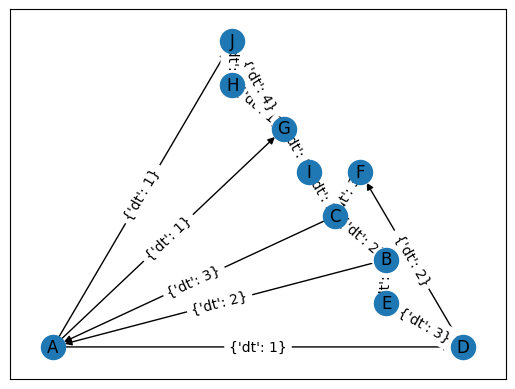

In [10]:
positions = nx.layout.planar_layout(taches)
nx.draw_networkx(taches, pos=positions)
nx.draw_networkx_edge_labels(taches, pos=positions);

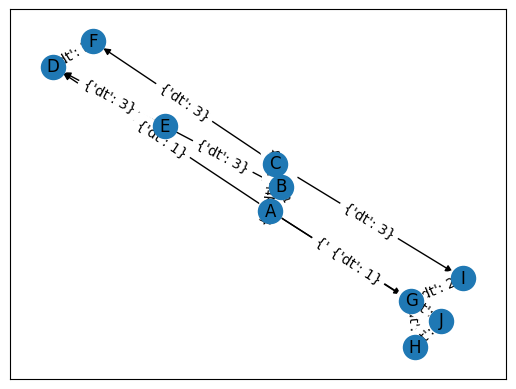

In [11]:
positions = nx.layout.spring_layout(taches)
nx.draw_networkx(taches, pos=positions)
nx.draw_networkx_edge_labels(taches, pos=positions);

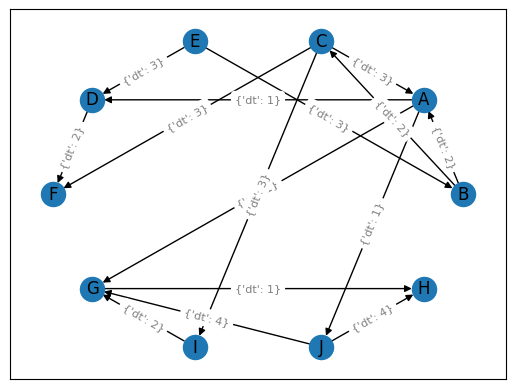

In [14]:
positions = nx.layout.circular_layout(taches)
nx.draw_networkx(taches, pos=positions)
nx.draw_networkx_edge_labels(taches, pos=positions, font_size=8, alpha=0.5);

## Exercice

1. Trouver dans `networkx` comment déterminer si un graphe n'a pas de cycle.
2. Trouver le chemin le plus long dans le graphe.
3. Déterminer l'emploi du temps optimal.

In [15]:
nx.is_directed_acyclic_graph(taches)

True

In [18]:
nx.dag_longest_path(taches, weight="dt")

['E', 'B', 'C', 'A', 'J', 'G', 'H']

In [19]:
nx.dag_longest_path_length(taches, weight="dt")

14

**REMARQUE** on doit en fait rajouter un sommet `Fin` vers lequel toutes les tâches pointent avec leurs durées.

In [20]:
taches = nx.DiGraph()

taches.add_edge("B", "A", dt=2)
taches.add_edge("C", "A", dt=3)
taches.add_edge("E", "B", dt=3)
taches.add_edge("B", "C", dt=2)
taches.add_edge("A", "D", dt=1)
taches.add_edge("E", "D", dt=3)
taches.add_edge("C", "F", dt=3)
taches.add_edge("D", "F", dt=2)
taches.add_edge("A", "G", dt=1)
taches.add_edge("I", "G", dt=2)
taches.add_edge("J", "G", dt=4)
taches.add_edge("G", "H", dt=1)
taches.add_edge("J", "H", dt=4)
taches.add_edge("C", "I", dt=3)
taches.add_edge("A", "J", dt=1)
taches.add_edge("A", "Fin", dt=1)
taches.add_edge("B", "Fin", dt=2)
taches.add_edge("C", "Fin", dt=3)
taches.add_edge("D", "Fin", dt=2)
taches.add_edge("E", "Fin", dt=3)
taches.add_edge("F", "Fin", dt=2)
taches.add_edge("G", "Fin", dt=1)
taches.add_edge("H", "Fin", dt=2)
taches.add_edge("I", "Fin", dt=2)
taches.add_edge("J", "Fin", dt=4)



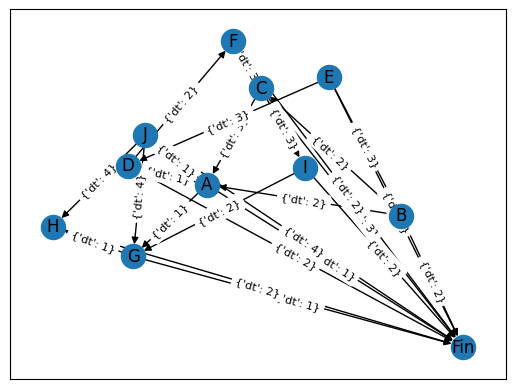

In [21]:
positions = nx.layout.spring_layout(taches)
nx.draw_networkx(taches, pos=positions)
nx.draw_networkx_edge_labels(taches, pos=positions, font_size=8);

In [22]:
nx.is_directed_acyclic_graph(taches)

True

In [23]:
nx.dag_longest_path_length(taches, weight="dt")

16

In [25]:
list(nx.topological_sort(taches))

['E', 'B', 'C', 'A', 'I', 'D', 'J', 'F', 'G', 'H', 'Fin']

In [26]:
from dataclasses import dataclass

In [27]:
@dataclass
class Tache:
    nom: str
    prerequis: list[str]
    duree: float | int

In [28]:
donnee = [
    Tache("A", ["B", "C"], 1),
    Tache("B", ["E"], 2),
    Tache("C", ["C"], 3),
    Tache("D", ["A", "E"], 2),
    Tache("E", [], 3),
    Tache("F", ["D", "C"], 2),
    Tache("G", ["A", "I", "J"], 1),
    Tache("H", ["G", "J"], 2),
    Tache("I", ["C"], 2),
    Tache("J", ["A"], 4),
]

In [32]:
# Alternatives
nx.to_dict_of_dicts(taches)

{'B': {'A': {'dt': 2}, 'C': {'dt': 2}, 'Fin': {'dt': 2}},
 'A': {'D': {'dt': 1}, 'G': {'dt': 1}, 'J': {'dt': 1}, 'Fin': {'dt': 1}},
 'C': {'A': {'dt': 3}, 'F': {'dt': 3}, 'I': {'dt': 3}, 'Fin': {'dt': 3}},
 'E': {'B': {'dt': 3}, 'D': {'dt': 3}, 'Fin': {'dt': 3}},
 'D': {'F': {'dt': 2}, 'Fin': {'dt': 2}},
 'F': {'Fin': {'dt': 2}},
 'G': {'H': {'dt': 1}, 'Fin': {'dt': 1}},
 'I': {'G': {'dt': 2}, 'Fin': {'dt': 2}},
 'J': {'G': {'dt': 4}, 'H': {'dt': 4}, 'Fin': {'dt': 4}},
 'H': {'Fin': {'dt': 2}},
 'Fin': {}}

## Exercice

Déterminer l'emploi du temps optimal

In [33]:
entrees = {
    tache.nom: tache for tache in donnee
}
entrees

{'A': Tache(nom='A', prerequis=['B', 'C'], duree=1),
 'B': Tache(nom='B', prerequis=['E'], duree=2),
 'C': Tache(nom='C', prerequis=['C'], duree=3),
 'D': Tache(nom='D', prerequis=['A', 'E'], duree=2),
 'E': Tache(nom='E', prerequis=[], duree=3),
 'F': Tache(nom='F', prerequis=['D', 'C'], duree=2),
 'G': Tache(nom='G', prerequis=['A', 'I', 'J'], duree=1),
 'H': Tache(nom='H', prerequis=['G', 'J'], duree=2),
 'I': Tache(nom='I', prerequis=['C'], duree=2),
 'J': Tache(nom='J', prerequis=['A'], duree=4)}

In [34]:
@dataclass
class Affectation:
    nom: str
    debut: float | int
    fin: float | int

In [35]:
EDT = dict[str, Affectation]

In [36]:
def cree_graphe(entree: dict[str, Tache]) -> nx.DiGraph:
    resultat = nx.DiGraph()
    for nom, tache in entree.items():
        for prerequis in tache.prerequis:
            resultat.add_edge(prerequis, nom, duree=entree[prerequis].duree)
    return resultat

In [45]:
def cree_edt(donnee: list[Tache]) -> EDT:
    entrees = {tache.nom: tache for tache in donnee}
    graphe = cree_graphe(entrees)
    assert nx.is_directed_acyclic_graph(graphe)
    resultat = dict()
    for tache in nx.topological_sort(graphe):
        try:
            debut=max(resultat[prerequis].fin for prerequis in entrees[tache].prerequis)
        except ValueError:
            debut=0
        resultat[tache] = Affectation(
            nom=tache,
            debut=debut,
            fin=debut+entrees[tache].duree,
        )
    return resultat

In [46]:
cree_edt(donnee)

AssertionError: 

## Exercice

Débugguer le code. Et transformer en libre avec des tests.